In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df=pd.read_csv('Linear_Regression_House_Dataset.csv')

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.shape

(4600, 18)

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [6]:
df.city.unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

<AxesSubplot:>

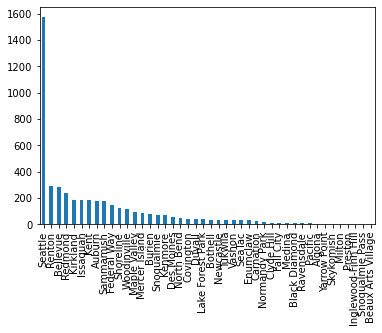

In [7]:
df['city'].value_counts().plot(kind='bar')

In [8]:
m=max(df['price'])
n=min(df['price'])
print(m)
print(n)

26590000.0
0.0


In [9]:
df[df['price']==0.0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,2014-05-05 00:00:00,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001,USA
4356,2014-05-05 00:00:00,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,WA 98199,USA
4357,2014-05-05 00:00:00,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,WA 98146,USA
4358,2014-05-06 00:00:00,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,WA 98075,USA
4361,2014-05-07 00:00:00,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,WA 98166,USA
4362,2014-05-07 00:00:00,0.0,4.0,4.00,3680,18804,2.0,0,0,3,3680,0,1990,2009,1223-1237 244th Ave NE,Sammamish,WA 98074,USA
4374,2014-05-09 00:00:00,0.0,2.0,2.50,2200,188200,1.0,0,3,3,2200,0,2007,0,39612 254th Ave SE,Enumclaw,WA 98022,USA
4376,2014-05-09 00:00:00,0.0,4.0,2.25,2170,10500,1.0,0,2,4,1270,900,1960,2001,216 SW 183rd St,Normandy Park,WA 98166,USA
4382,2014-05-12 00:00:00,0.0,5.0,4.50,4630,6324,2.0,0,0,3,3210,1420,2006,0,6925 Oakmont Ave SE,Snoqualmie,WA 98065,USA
4383,2014-05-13 00:00:00,0.0,5.0,4.00,4430,9000,2.0,0,0,3,4430,0,2013,1923,9235 NE 5th St,Bellevue,WA 98004,USA


In [10]:
df.loc[~(df['price']==0)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


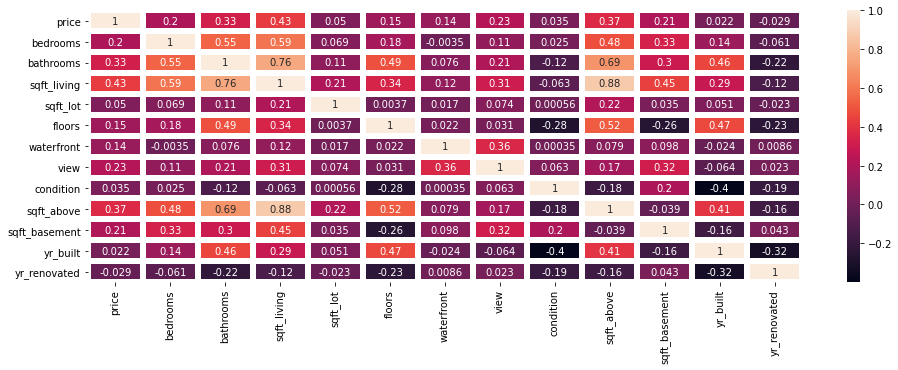

In [11]:
figsize=(10,10)
plt.figure(figsize = (16,5))
ax = sns.heatmap(df.corr(), annot=True,linewidths=5)

In [12]:
df.country.value_counts()

USA    4600
Name: country, dtype: int64

In [13]:
df.date

0       2014-05-02 00:00:00
1       2014-05-02 00:00:00
2       2014-05-02 00:00:00
3       2014-05-02 00:00:00
4       2014-05-02 00:00:00
               ...         
4595    2014-07-09 00:00:00
4596    2014-07-09 00:00:00
4597    2014-07-09 00:00:00
4598    2014-07-10 00:00:00
4599    2014-07-10 00:00:00
Name: date, Length: 4600, dtype: object

In [14]:
df=df.drop(['date','street','city','statezip','country'],axis=1)

<AxesSubplot:>

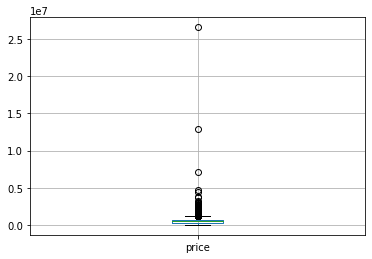

In [15]:

df.boxplot(['price'])

In [16]:
print('old',df.shape)
df=df[(np.abs(stats.zscore(df['price'])) < 3)]
df.shape

old (4600, 13)


(4566, 13)

<AxesSubplot:>

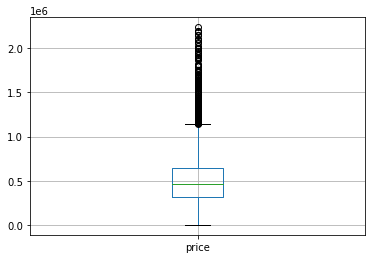

In [17]:
df.boxplot(['price'])

In [18]:
df=df[np.abs(df['price']-df['price'].mean()) <= (1.5*df['price'].std())]

<AxesSubplot:>

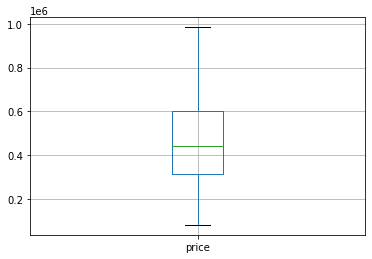

In [19]:
df.boxplot(['price'])

<AxesSubplot:>

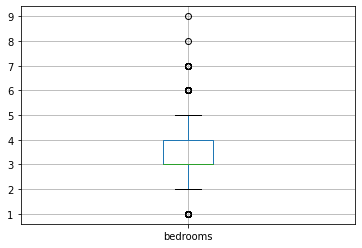

In [20]:
df.boxplot(['bedrooms'])

In [21]:
df.shape

(4196, 13)

In [22]:
df['waterfront'].value_counts()

0    4183
1      13
Name: waterfront, dtype: int64

In [23]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [24]:
df=df.drop(['sqft_lot','waterfront','view'],axis=1)

In [25]:
type(df['floors'][0])

numpy.float64

In [26]:

df['floors'].value_counts()

1.0    2082
2.0    1564
1.5     403
3.0     120
2.5      26
3.5       1
Name: floors, dtype: int64

In [27]:
df[['floors']] = df[['floors']].applymap(np.int64)

<AxesSubplot:>

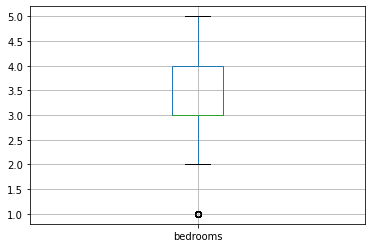

In [28]:
df=df[np.abs(df['bedrooms']-df['bedrooms'].mean()) <= (3*df['bedrooms'].std())]
df.boxplot(['bedrooms'])

<AxesSubplot:>

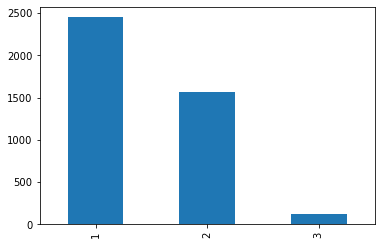

In [29]:
df['floors'].value_counts().plot(kind='bar')

In [30]:
l=df.corr()['price']
print(l)
l.abs()

price            1.000000
bedrooms         0.310345
bathrooms        0.459734
sqft_living      0.608870
floors           0.239597
condition        0.039365
sqft_above       0.516206
sqft_basement    0.221148
yr_built         0.059130
yr_renovated    -0.076062
Name: price, dtype: float64


price            1.000000
bedrooms         0.310345
bathrooms        0.459734
sqft_living      0.608870
floors           0.239597
condition        0.039365
sqft_above       0.516206
sqft_basement    0.221148
yr_built         0.059130
yr_renovated     0.076062
Name: price, dtype: float64

In [31]:
l.sort_values(ascending=False)

price            1.000000
sqft_living      0.608870
sqft_above       0.516206
bathrooms        0.459734
bedrooms         0.310345
floors           0.239597
sqft_basement    0.221148
yr_built         0.059130
condition        0.039365
yr_renovated    -0.076062
Name: price, dtype: float64

In [47]:
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(df)
col=['sqft_living','sqft_above','bathrooms','bedrooms','floors','yr_renovated','sqft_basement']

In [48]:
X = df[col] 
y = df['price'] 

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 42)

In [50]:
reg = LinearRegression() 
model=reg.fit(X_train, y_train) 

 

r_sq = model.score(X_train, y_train) 

print('coefficient of determination:', r_sq) 

 

print('intercept:', model.intercept_) 

 

print('slope:', model.coef_) 

coefficient of determination: 0.37965447729179524
intercept: 182335.48792766768
slope: [ 1.08504349e+02  4.94683542e+01  1.10341030e+04 -2.14062390e+04
  1.18335966e+04  6.76796917e+00  5.90359944e+01]


In [51]:
y_pred=reg.predict(X_test)

In [52]:
model.score(X_test,y_test)

0.378850650692796

In [53]:
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(df)

In [54]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
r_square=r2_score(y_test,y_pred)

In [55]:
RMSE

154209.22791615594

In [56]:
r_square

0.378850650692796

In [82]:
import statistics

In [85]:
l=[15,28,25,48,22,43,49,34,22,33,27,25,22,20,39]
l.sort()

In [88]:
statistics.mean(l)

30.133333333333333

In [87]:
print(l[8])

28
